In [1]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [2]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 217MB/s]


In [28]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [60]:
!wget 'https://upload.wikimedia.org/wikipedia/commons/6/6e/Golde33443.jpg' -O dog.jpg



--2024-11-15 17:21:39--  https://upload.wikimedia.org/wikipedia/commons/6/6e/Golde33443.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 212652 (208K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>] 207.67K  --.-KB/s    in 0.1s    

2024-11-15 17:21:39 (1.88 MB/s) - ‘dog.jpg’ saved [212652/212652]



In [58]:
ig = Image.open("/content/dog.jpg")
# Define the new size (e.g., 256x256)
new_size = (256, 256)

# Resize the image
resized_ig = ig.resize(new_size)

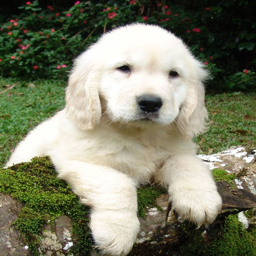

In [59]:
resized_ig

In [29]:
transf = T.ToTensor()
image = transf(ig)


In [30]:
with torch.no_grad():
    pred = model([image])  # Inference step


In [31]:
pred

[{'boxes': tensor([[ 28.5471,  76.5705, 682.9333, 939.6096],
          [  0.0000, 127.7171, 689.4531, 962.8073],
          [ 13.6979, 200.0968, 687.2183, 947.6991],
          [ 25.5111,  10.2634, 493.9023, 271.7541],
          [103.2664, 246.4756, 121.6926, 263.2238]]),
  'labels': tensor([18, 17, 23, 64, 53]),
  'scores': tensor([0.9956, 0.1740, 0.0759, 0.0694, 0.0570])}]

In [32]:
type(pred[0])

dict

In [33]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [34]:
boxxes, labels, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]

In [35]:
labels

tensor([18, 17, 23, 64, 53])

In [36]:
scores

tensor([0.9956, 0.1740, 0.0759, 0.0694, 0.0570])

In [37]:
scores>0.9

tensor([ True, False, False, False, False])

In [38]:
num =2

In [39]:
co_names =  ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [54]:
igg = cv2.imread("/content/dog.jpg")


for i in range(num):
  x1,y1 , x2,y2 = boxxes[i].numpy().astype("int")
  class_name = co_names[labels.numpy()[i]-1] #list so -1
  igg = cv2.rectangle(igg,(x1,y1),(x2,y2),(0,255,0),1)
  igg = cv2.putText(igg,class_name,(x1,y1),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1, cv2.LINE_AA)



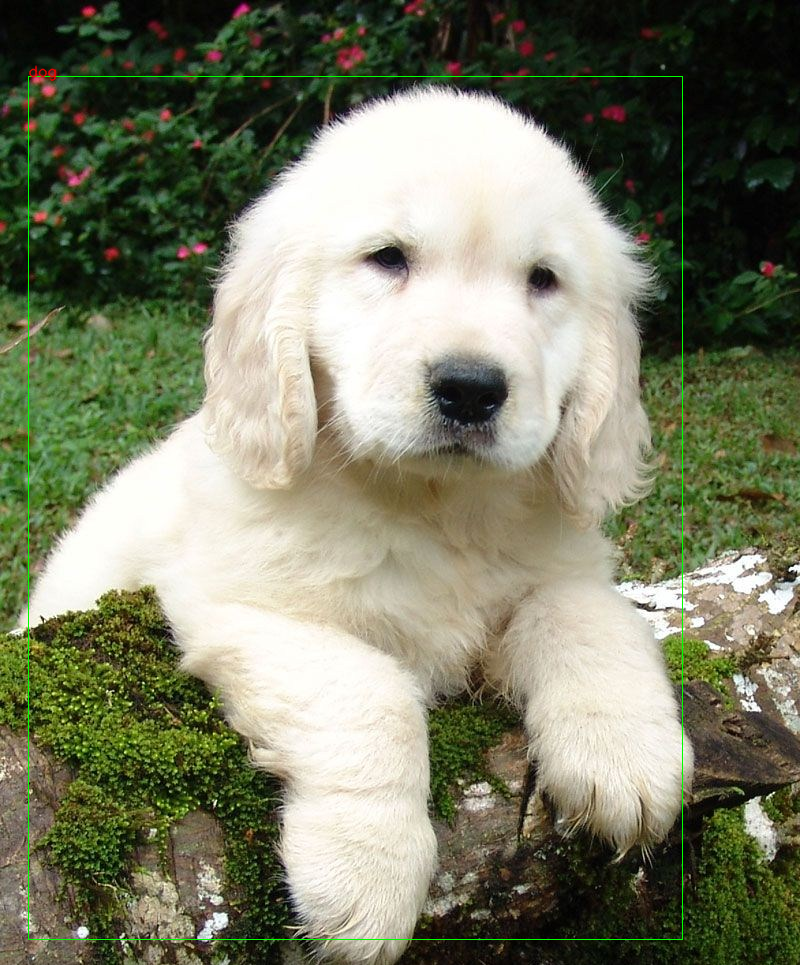

In [55]:
cv2_imshow(igg)
